# Introduction & Objetives

As an Industrial Engineer and the Data Science Leader  of an small consulting project, I am interested in how successful models from one industry can be adapted to others, generating valuable insights. This project utilizes a dataset titled "Wine Quality," which is publicly available for research and widely used in Data Science. With this dataset, I aim to develop a model that could potentially be applied across various industries.

The objectives are as follows:

1.   Explore the dataset.
2.   Determine whether any physicochemical variable, or combination of variables, can reliably predict wine quality.







Dataset:

1.   Title: Wine Quality
2.   Sources: Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos, and Jose Reis (CVRVV) @ 2009.
*P. Cortez, A. Cerdeira, F. Almeida, T. Matos y J. Reis. Modeling wine preferences by data mining from physicochemical properties.En Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.*
3.   Past Usage: The study by P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis used two datasets created with samples of red and white wine. The inputs include objective tests (e.g., pH values), and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).
4.   Relevant Information: The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistical issues, only physicochemical (inputs) and sensory (output) variables are available (e.g., there is no data about grape types, wine brand, wine selling price, etc.). These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g., there are many more normal wines than excellent or poor ones).


# Data Understanding: Exploratory Data Analysis - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install gdown
import gdown
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.formula.api as sm
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import statsmodels.formula.api as sm



## Reading the DS from google drive.
--

In [2]:
# Download the files from Google Drive using gdown
url_red = 'https://drive.google.com/uc?id=1tZm5mHgzGRi0YUDVnxa0G3_6srR5g5Jv'
url_white = 'https://drive.google.com/uc?id=1YOb1jjIlJDQZEa9XXtbsHxdd1l-QzO_c'

output_red = 'winequality-red.csv'
output_white = 'winequality-white.csv'

gdown.download(url_red, output_red, quiet=False)
gdown.download(url_white, output_white, quiet=False)

# Read the CSV files using pandas, handling potential errors
try:
    df_red = pd.read_csv(output_red, header=0, sep=';', on_bad_lines='skip')  # Skip bad lines
    df_white = pd.read_csv(output_white, header=0, sep=';', on_bad_lines='skip')  # Skip bad lines

except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")


Downloading...
From: https://drive.google.com/uc?id=1tZm5mHgzGRi0YUDVnxa0G3_6srR5g5Jv
To: /content/winequality-red.csv
100%|██████████| 84.2k/84.2k [00:00<00:00, 50.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YOb1jjIlJDQZEa9XXtbsHxdd1l-QzO_c
To: /content/winequality-white.csv
100%|██████████| 264k/264k [00:00<00:00, 60.1MB/s]


The dataframes are identified with an added collum. It indicates "red" for df_red and white for df_white.

Then, both dataframe are jointed in a new one, that is titled "df_wine".  

In [3]:
df_red_ = df_red.copy()
df_white_ = df_white.copy()

df_red_['type'] = 'red'
df_white_['type'] = 'white'

df_wine = pd.concat([df_red_, df_white_], ignore_index=True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df_wine[df_wine.type == "red"].describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df_wine[df_wine.type == "white"].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


It easy to notice that there are more mesures related to white wine than red wine. In adition, almost every average is diferent between the two types of wines, just "Density", "pH" and "alcohol" look similar.

Are there Nan values or empty espaces in the data set?
--

In [7]:
# Count the number of None or empty (NaN) values in each column of df_wine
null_counts = df_wine.isnull().sum()

null_counts

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


There are not "Nan" or empty values, so it is no necessary of data cleaning or preprocessing.
-

Are there any diference between the two types of wines cosidering the values of the physicochemical variables?
--


To explore this question, the variables are plotted. On the one hand, an Histrogram and, on the other hand, a boxplot.

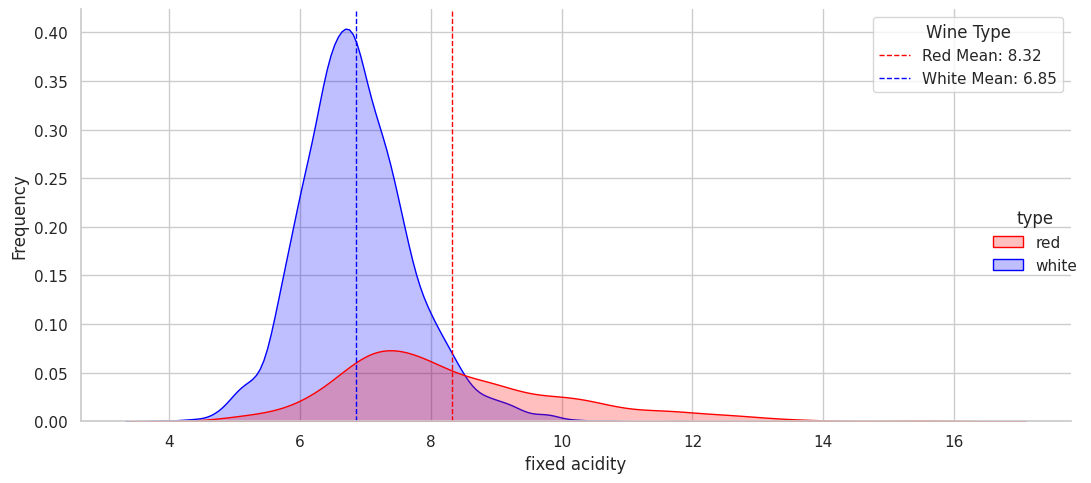

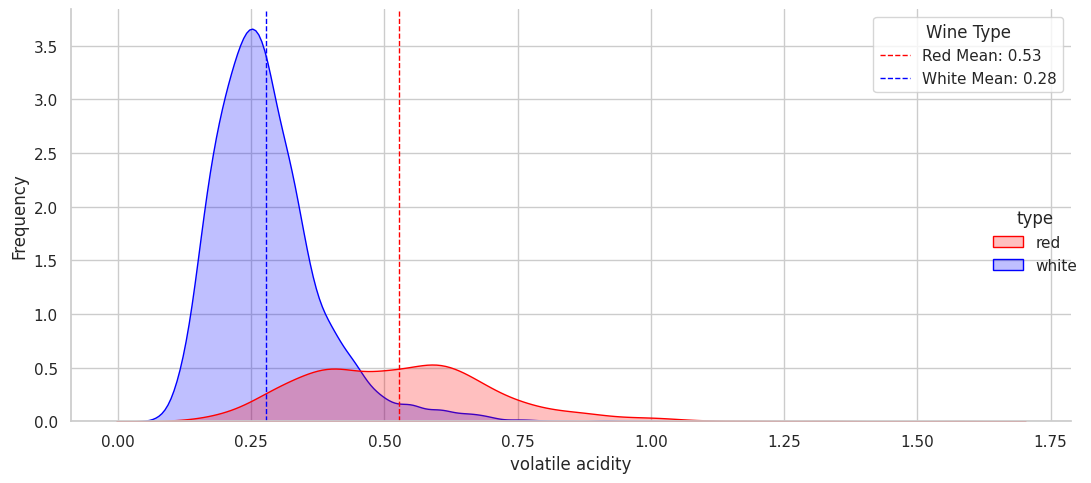

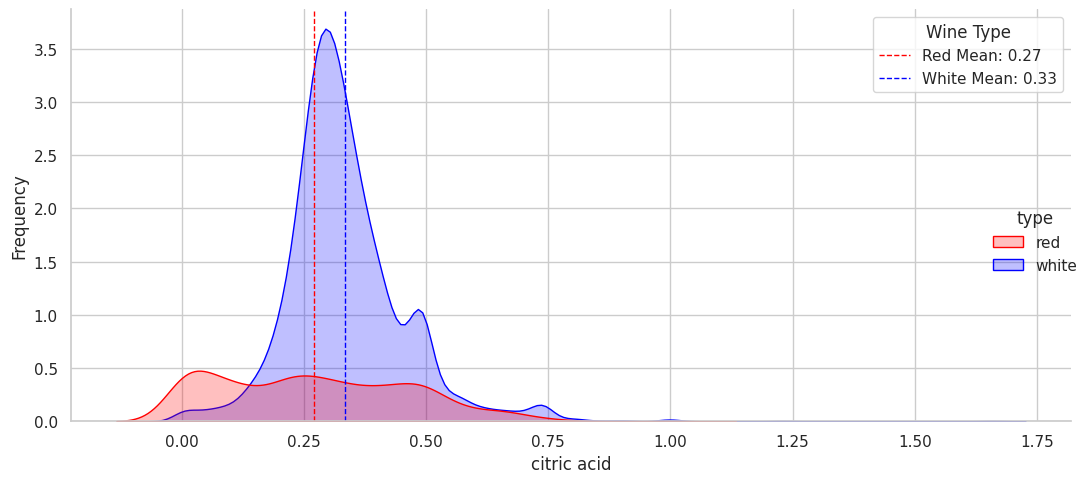

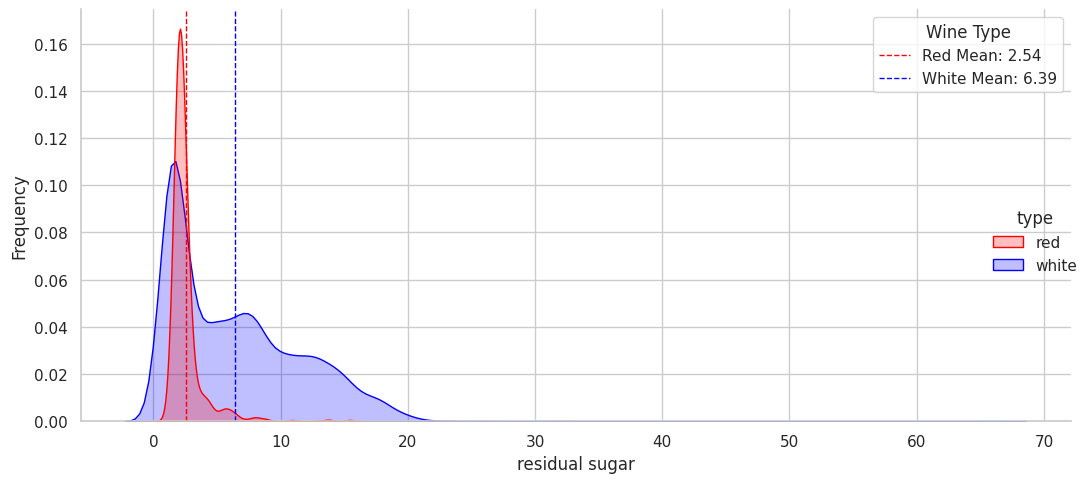

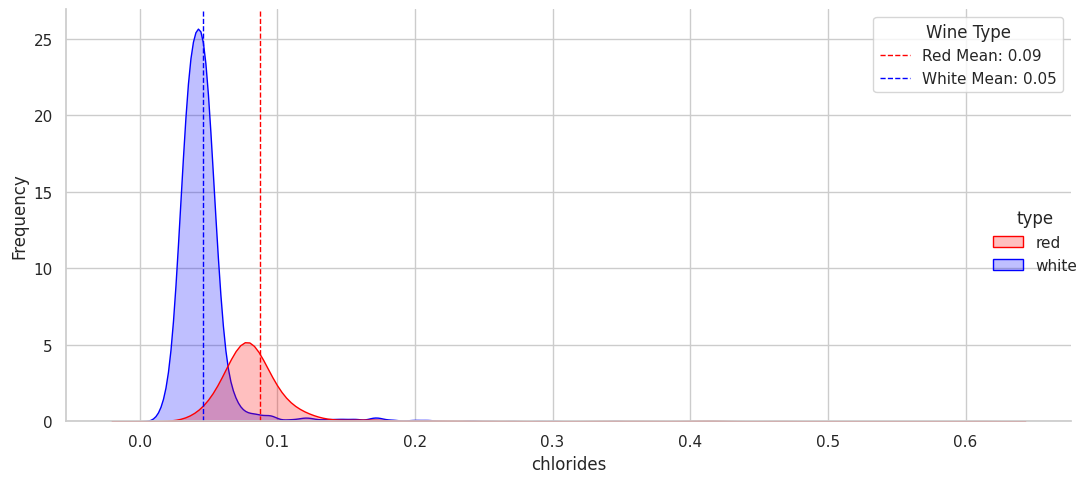

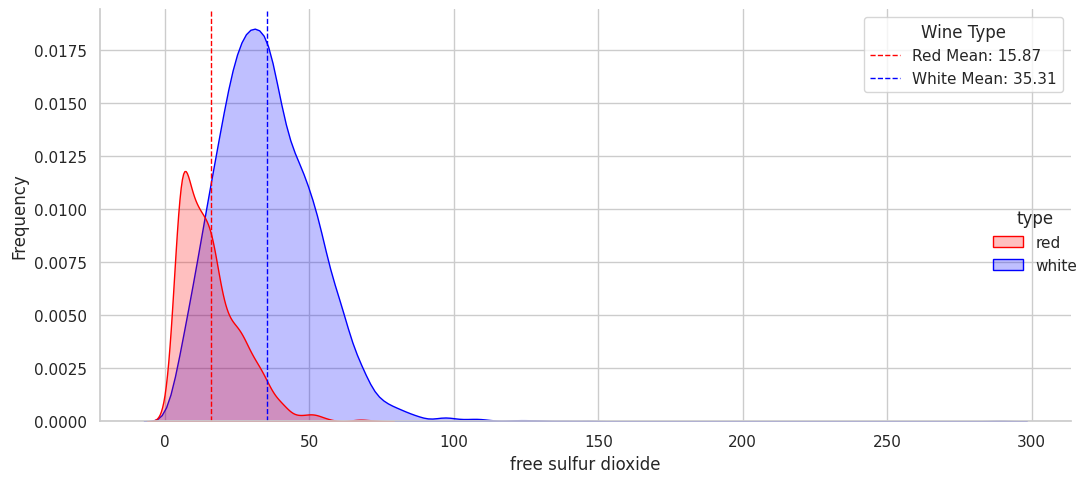

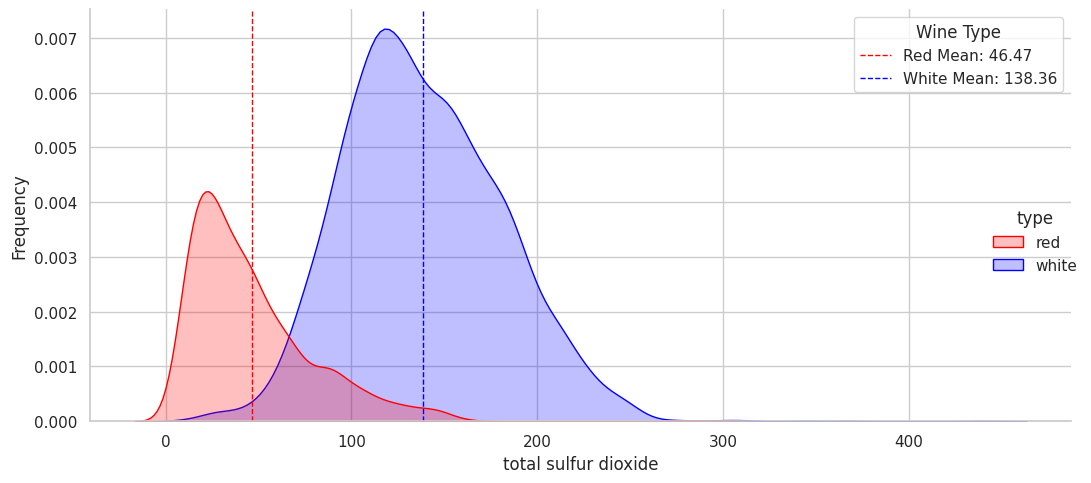

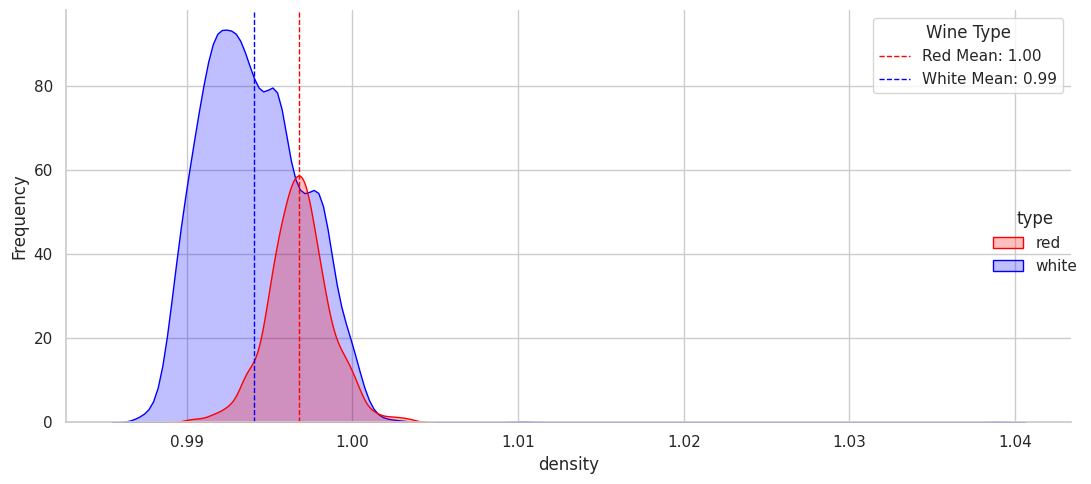

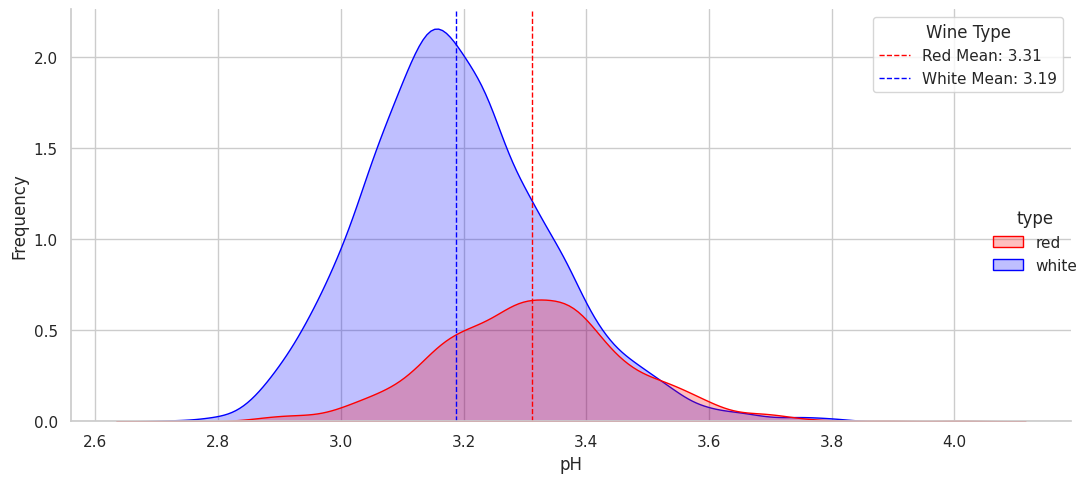

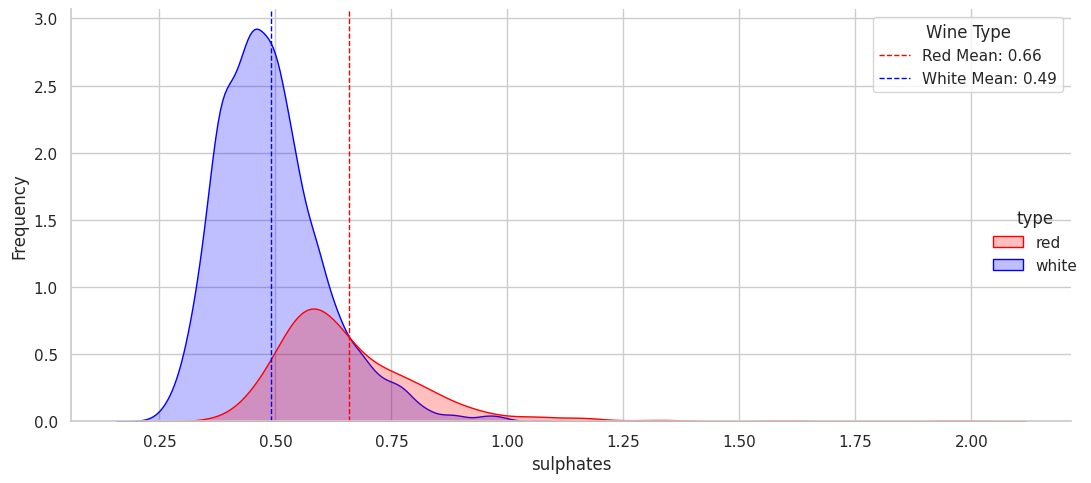

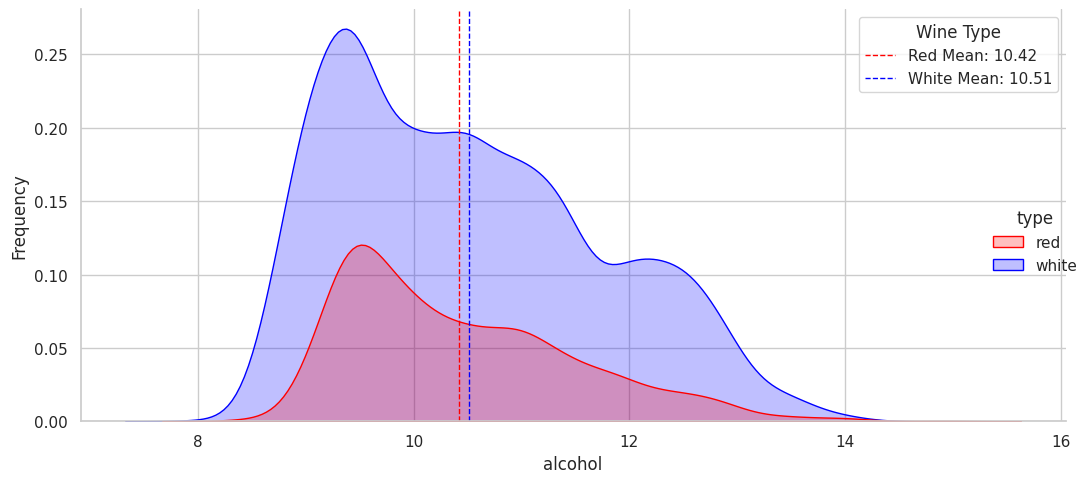

In [8]:
# Selecciona las columnas numéricas (excepto 'quality' y 'type')
numerical_cols = df_wine.columns[:-2]

# Configura el estilo de Seaborn
sns.set(style='whitegrid')

# Crea histogramas para cada columna numérica agrupados por 'type'
for col in numerical_cols:
    # Crea un FacetGrid de Seaborn
    g = sns.displot(
        data=df_wine,
        x=col,
        hue='type',
        kind='kde',
        fill=True,
        palette={"red": "red", "white": "blue"},
        height=5,
        aspect=2
    )

    # Calcula las medias para cada tipo de vino
    red_mean = df_wine[df_wine['type'] == 'red'][col].mean()
    white_mean = df_wine[df_wine['type'] == 'white'][col].mean()

    # Dibuja líneas verticales para las medias en el gráfico correspondiente
    g.axes[0][0].axvline(red_mean, color='red', linestyle='--', linewidth=1, label=f'Red Mean: {red_mean:.2f}')
    g.axes[0][0].axvline(white_mean, color='blue', linestyle='--', linewidth=1, label=f'White Mean: {white_mean:.2f}')

    # Ajusta los detalles del gráfico
    g.set_axis_labels(col, 'Frequency')
    g.set_titles(f'Histogram of {col} by Wine Type')

    # Añade la leyenda correctamente
    g.axes[0][0].legend(title='Wine Type')

    # Ajusta el diseño de los márgenes
    plt.tight_layout()


<Figure size 800x600 with 0 Axes>

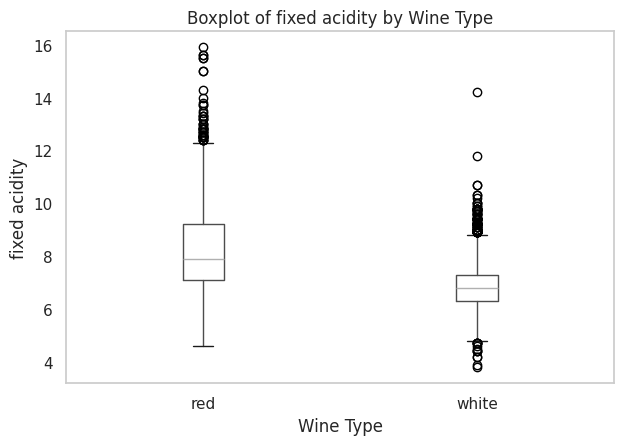

<Figure size 800x600 with 0 Axes>

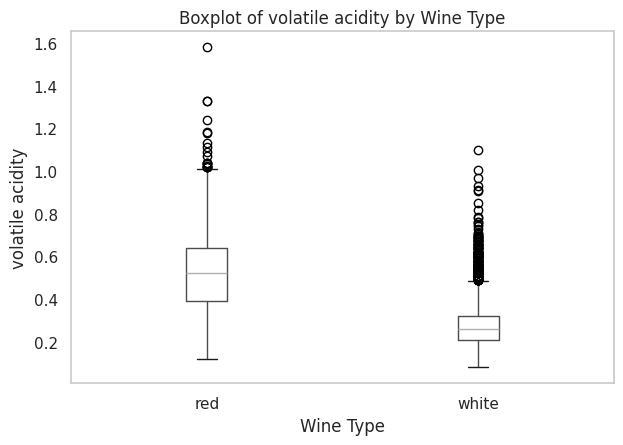

<Figure size 800x600 with 0 Axes>

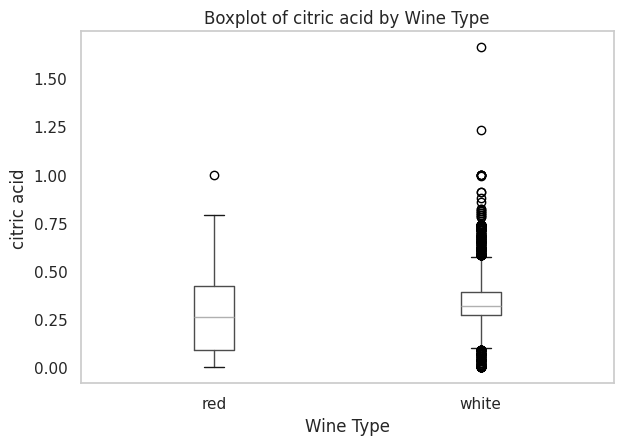

<Figure size 800x600 with 0 Axes>

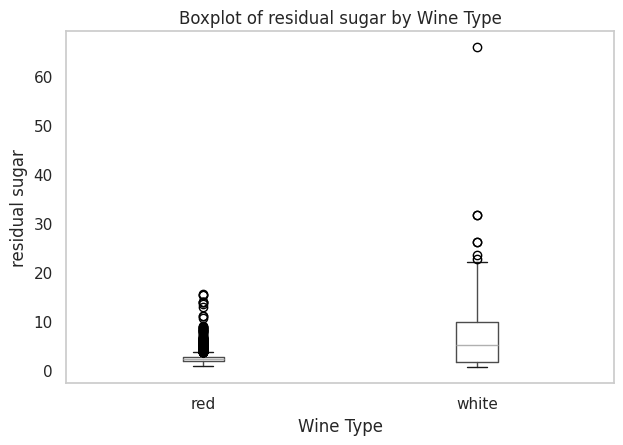

<Figure size 800x600 with 0 Axes>

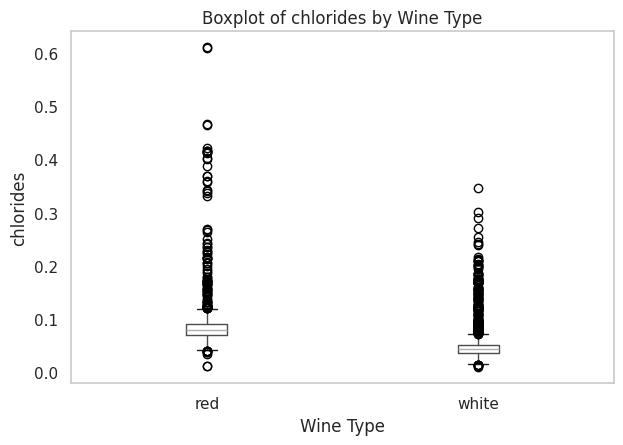

<Figure size 800x600 with 0 Axes>

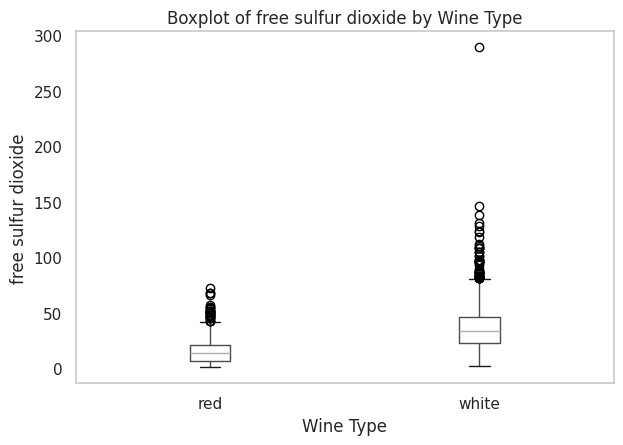

<Figure size 800x600 with 0 Axes>

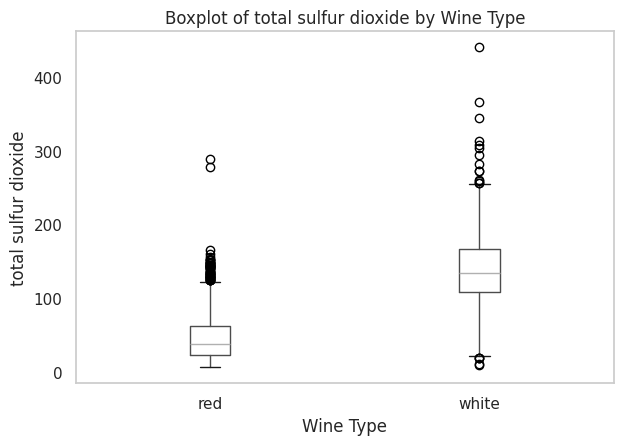

<Figure size 800x600 with 0 Axes>

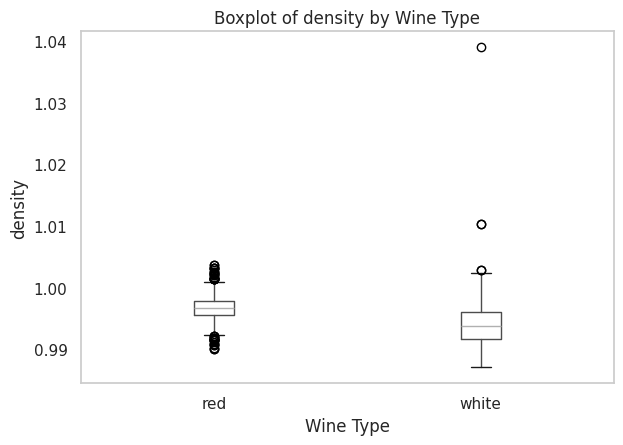

<Figure size 800x600 with 0 Axes>

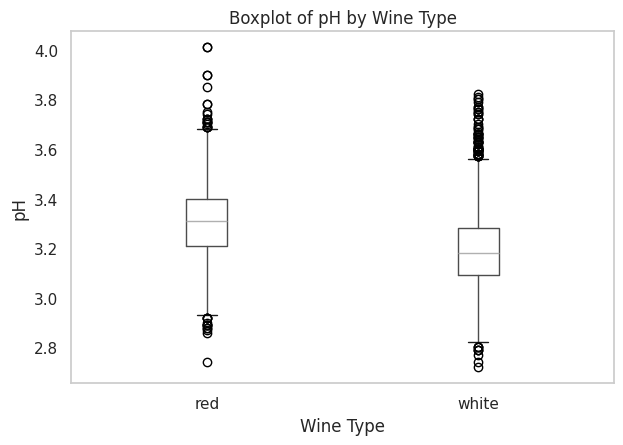

<Figure size 800x600 with 0 Axes>

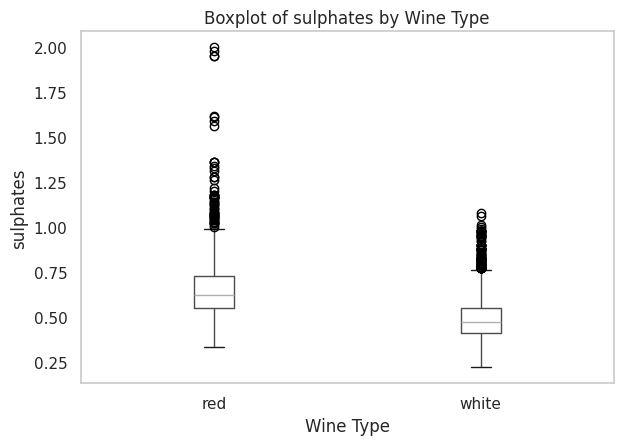

<Figure size 800x600 with 0 Axes>

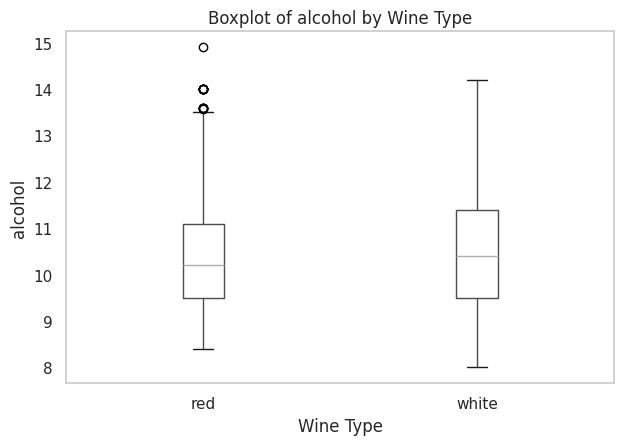

In [9]:
# List of numeric columns (excluding 'quality' and 'type')
numeric_cols = df_wine.columns[:-2]  # All columns except 'quality' and 'type'

# Create boxplots for each numeric column, grouped by 'type'
for col in numeric_cols:
    plt.figure(figsize=(8, 6))

    # Create the boxplot
    df_wine.boxplot(column=col, by='type', grid=False)

    # Set title and labels
    plt.title(f'Boxplot of {col} by Wine Type')
    plt.suptitle('')  # Remove the automatic 'by' title
    plt.xlabel('Wine Type')
    plt.ylabel(col)

    # Display the plot
    plt.tight_layout()
    plt.show()

As it is observed in the plots of each variable, the physicochemical variables show diferent behaviors considering the different type of wine.

**Are the means of two groups (red wine and white wine) significantly different?**

To compare whether the means of each numerical variable differ significantly between red and white wines, it is used a t-test for independent samples.

H₀: The mean of the variable is equal between red and white wines.

H₁: The mean of the variable is different between red and white wines.

p-value = 0.05

In [10]:
# List of numerical columns excluding 'quality' and 'type'
numerical_cols = df_wine.columns[:-2]

# Create an empty list to store the results
results_list = []

# Loop through each numerical column and perform the t-test for red and white wines
for col in numerical_cols:
    # Filter data for the current numerical column based on wine type
    red_data = df_wine[df_wine['type'] == 'red'][col]
    white_data = df_wine[df_wine['type'] == 'white'][col]

    # Perform the t-test
    t_stat, p_value = ttest_ind(red_data, white_data, equal_var=False)  # Using Welch's t-test

    # Determine if the difference is significant based on the p-value
    significant = 'Yes' if p_value < 0.05 else 'No'

    # Append the results to the list as a dictionary
    results_list.append({
        'Variable': col,
        't-statistic': t_stat,
        'p-value': p_value,
        'Significant Difference': significant
    })

# Create the DataFrame from the list of results
results = pd.DataFrame(results_list)

# Display the results
print(results)


                Variable  t-statistic        p-value Significant Difference
0          fixed acidity    32.422711  5.668161e-183                    Yes
1       volatile acidity    53.059093   0.000000e+00                    Yes
2            citric acid   -12.228986   3.172970e-33                    Yes
3         residual sugar   -47.802237   0.000000e+00                    Yes
4              chlorides    34.240211  6.094754e-199                    Yes
5    free sulfur dioxide   -54.427948   0.000000e+00                    Yes
6   total sulfur dioxide   -89.872059   0.000000e+00                    Yes
7                density    42.708511   0.000000e+00                    Yes
8                     pH    27.775497  2.342265e-149                    Yes
9              sulphates    37.055905  1.678842e-231                    Yes
10               alcohol    -2.859029   4.277780e-03                    Yes


Considering a p-value of 0.05, means are different between the two type of wine.

**Bottom line: **

*   we must analyse them separately.
*   It is necessary to analyse outliers: which is the quality report and which are the value of the rest of physicochemical variables in the wine that is the outlier value, Are there a relationship? We are going to analyse these questions during this work.






Are the variable normally distributed?
--

To test whether each numerical variable in the dataset is normally distributed for both red and white wines, it is used the Shapiro-Wilk test, which is commonly used for testing normality. If the p-value is less than a chosen significance level (e.g., 0.05), the data is considered not normally distributed.

In [11]:
import pandas as pd
from scipy.stats import shapiro

# List of numerical columns excluding 'quality' and 'type'
numerical_cols = df_wine.columns[:-2]

# Create an empty list to store the results
results_list = []

# Loop through each numerical column and perform the Shapiro-Wilk test for red and white wines
for col in numerical_cols:
    for wine_type in ['red', 'white']:
        # Filter data for the current wine type
        data = df_wine[df_wine['type'] == wine_type][col]

        # Perform the Shapiro-Wilk test
        stat, p_value = shapiro(data)

        # Determine if the distribution is normal based on the p-value
        normal = 'Yes' if p_value > 0.05 else 'No'

        # Append the results to the list as a dictionary
        results_list.append({
            'Variable': col,
            'Type': wine_type,
            'W-Statistic': stat,
            'p-value': p_value,
            'Normal': normal
        })

# Create the DataFrame from the list of results
results = pd.DataFrame(results_list)

# Display the results
print(results)

                Variable   Type  W-Statistic       p-value Normal
0          fixed acidity    red     0.942030  1.525012e-24     No
1          fixed acidity  white     0.976561  1.150152e-27     No
2       volatile acidity    red     0.974337  2.692935e-16     No
3       volatile acidity  white     0.904550  4.586798e-48     No
4            citric acid    red     0.955292  1.021932e-21     No
5            citric acid  white     0.922247  1.013180e-44     No
6         residual sugar    red     0.566077  1.020162e-52     No
7         residual sugar  white     0.884569  2.820712e-51     No
8              chlorides    red     0.484247  1.179056e-55     No
9              chlorides  white     0.590808  2.140584e-75     No
10   free sulfur dioxide    red     0.901839  7.694597e-31     No
11   free sulfur dioxide  white     0.942069  3.857850e-40     No
12  total sulfur dioxide    red     0.873225  3.573451e-34     No
13  total sulfur dioxide  white     0.989015  4.383458e-19     No
14        

Considering a p-value of 0.05, none of the variables are normally distributed.

Are there any corelation between the quality of the wine and (or between) any phycoquemical variable?


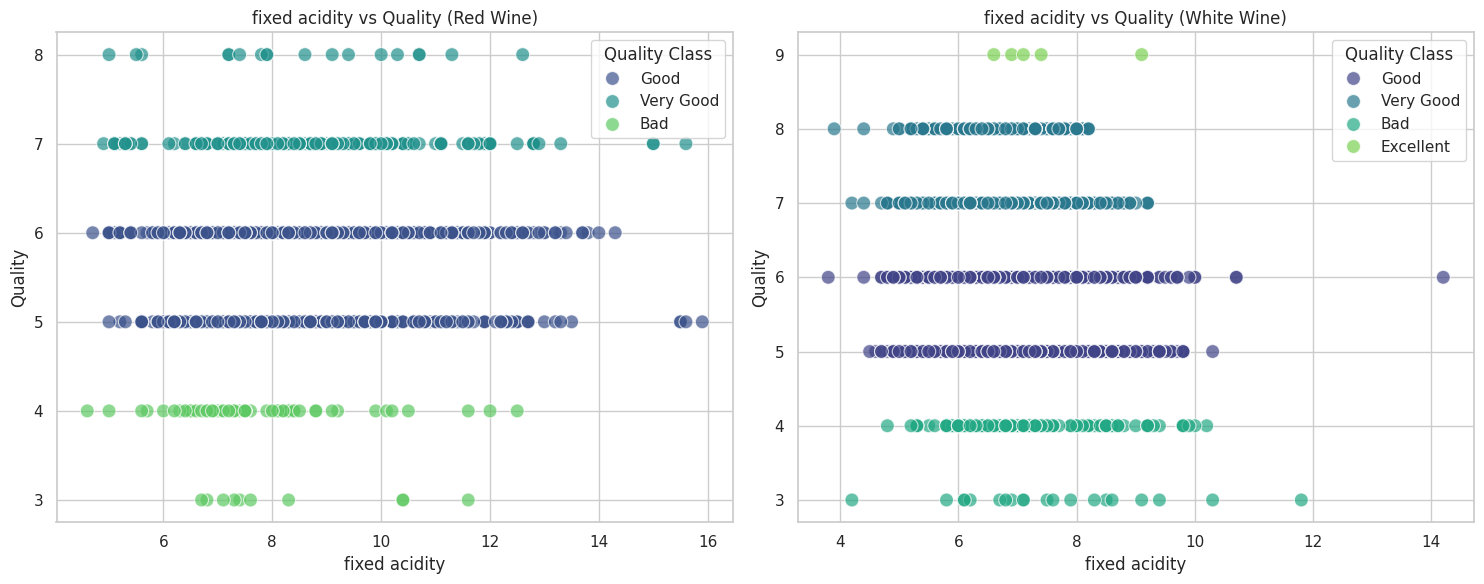

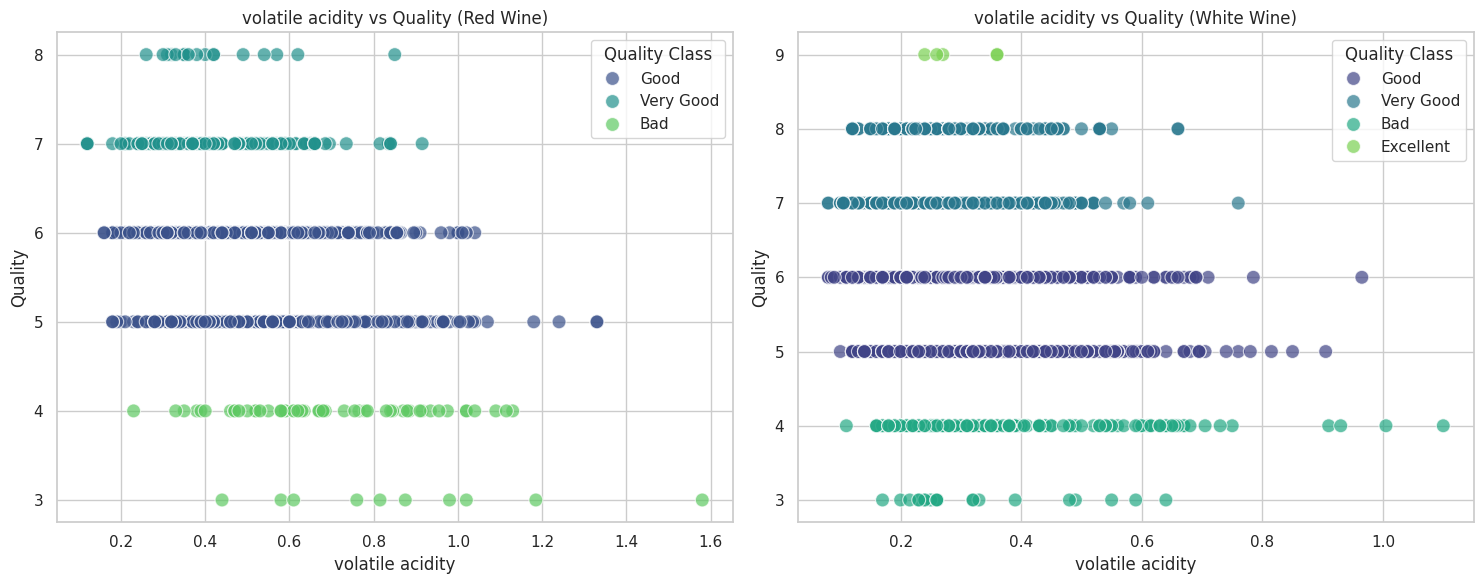

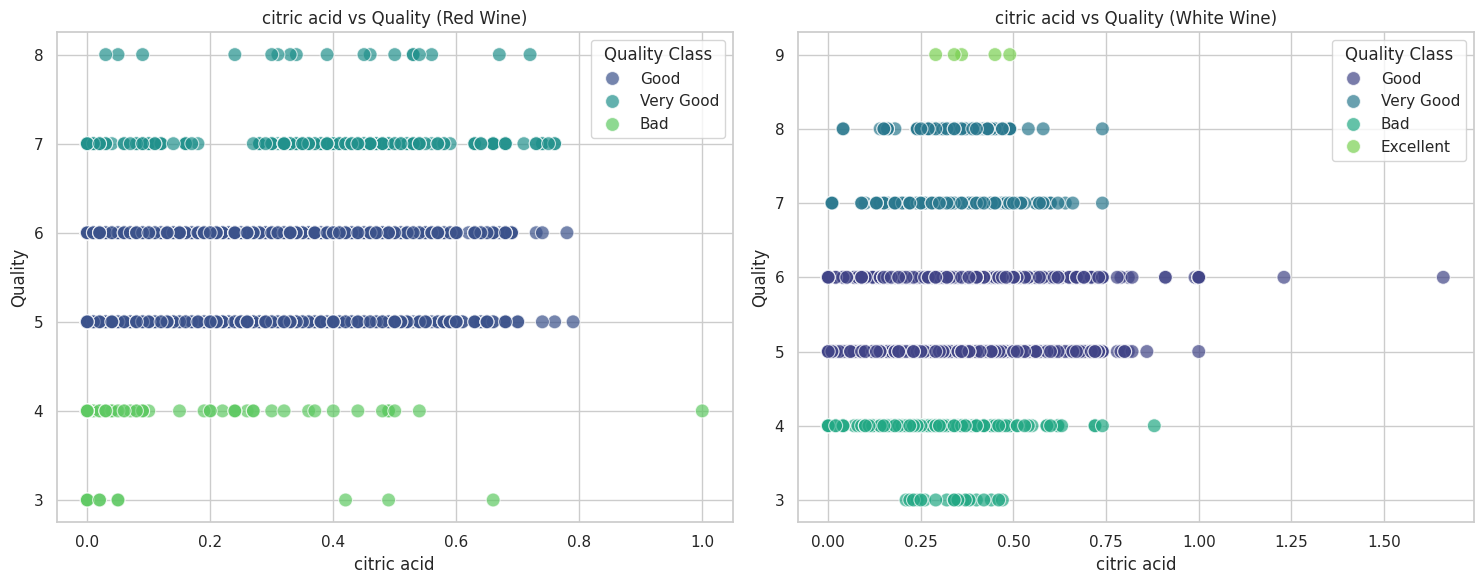

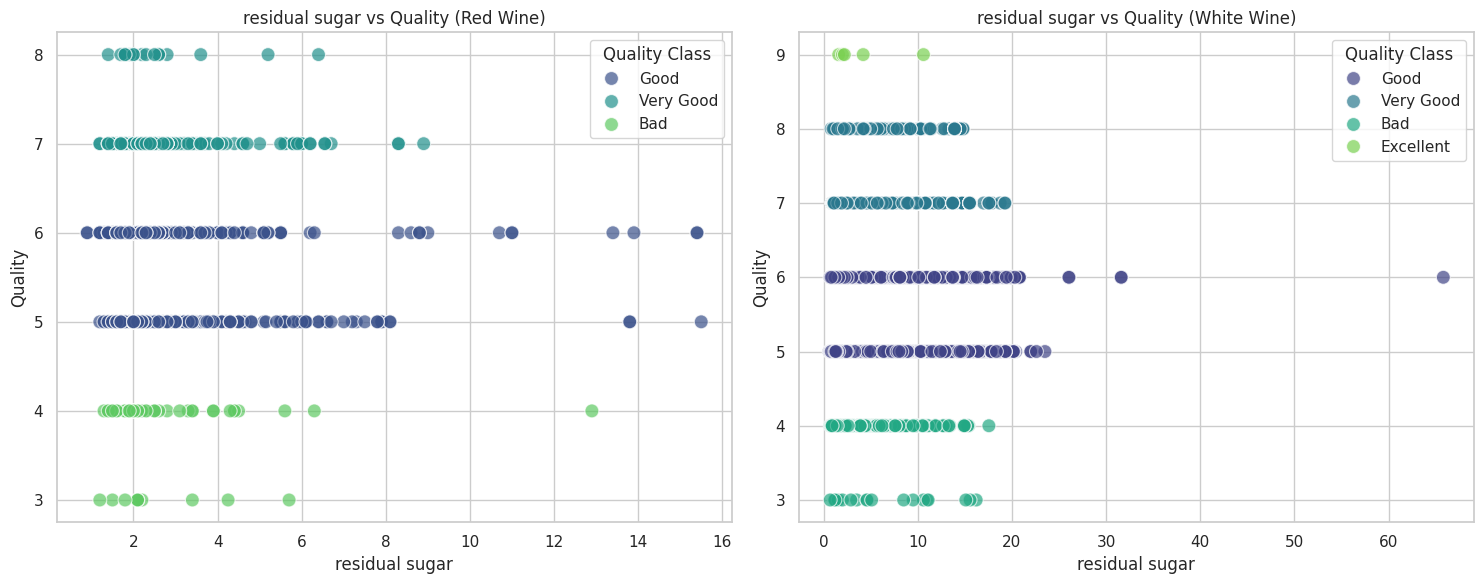

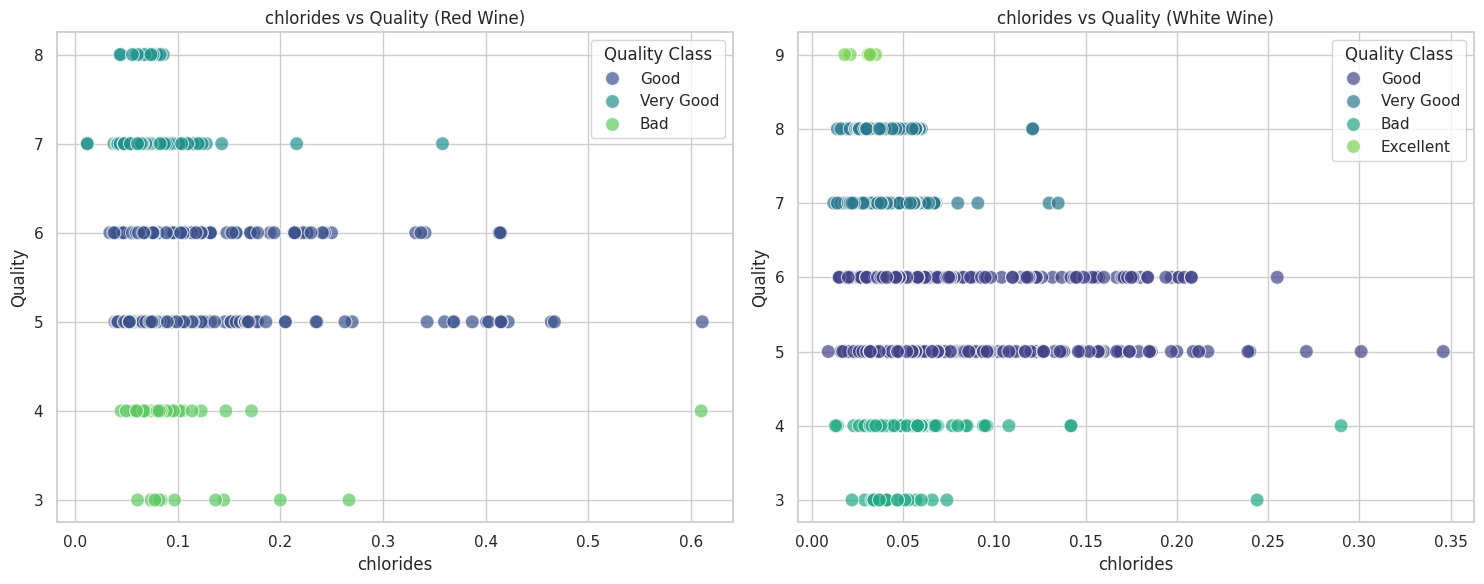

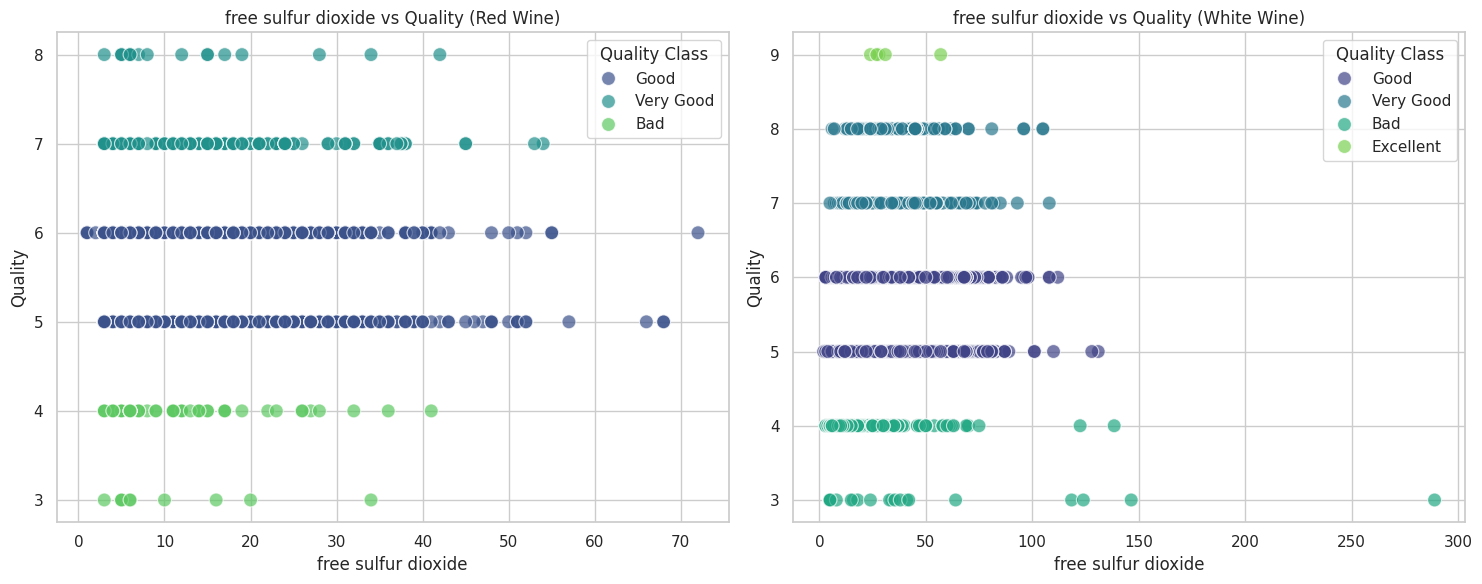

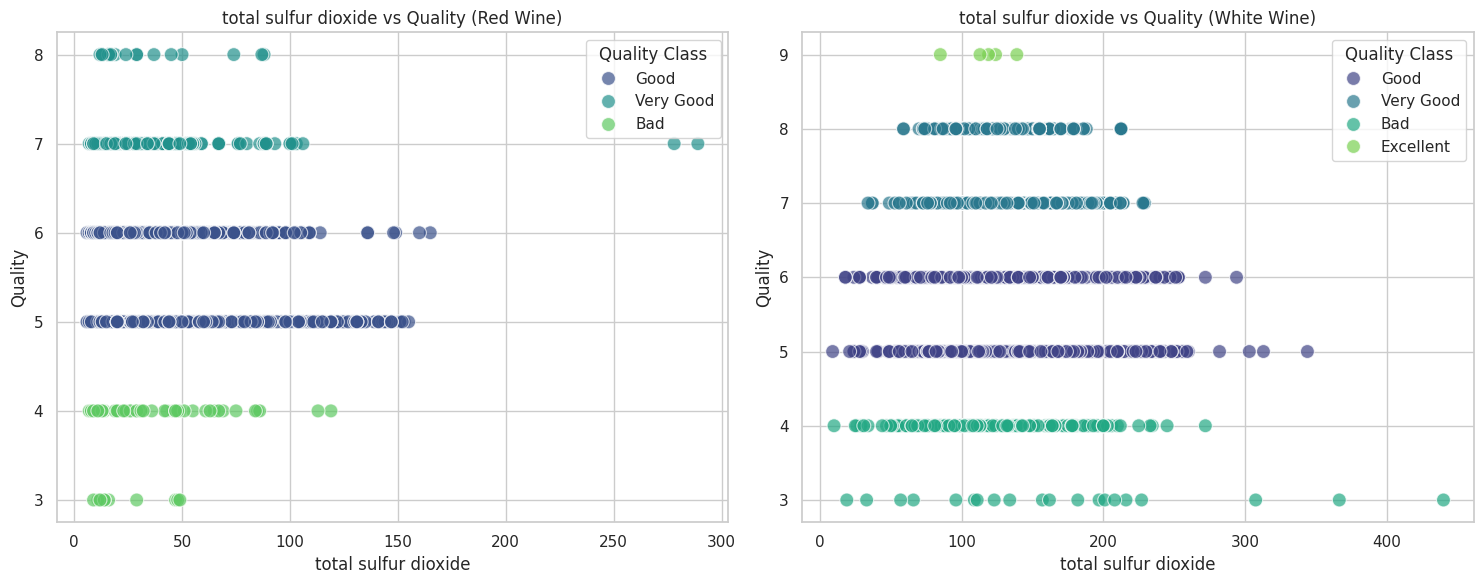

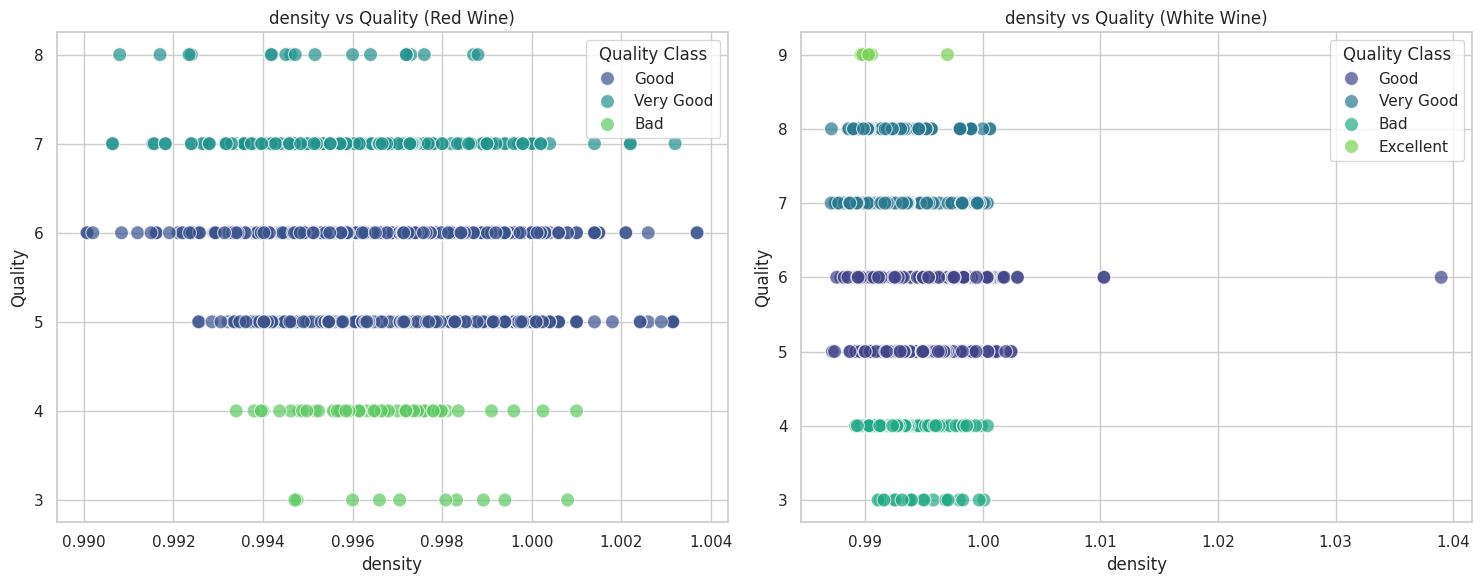

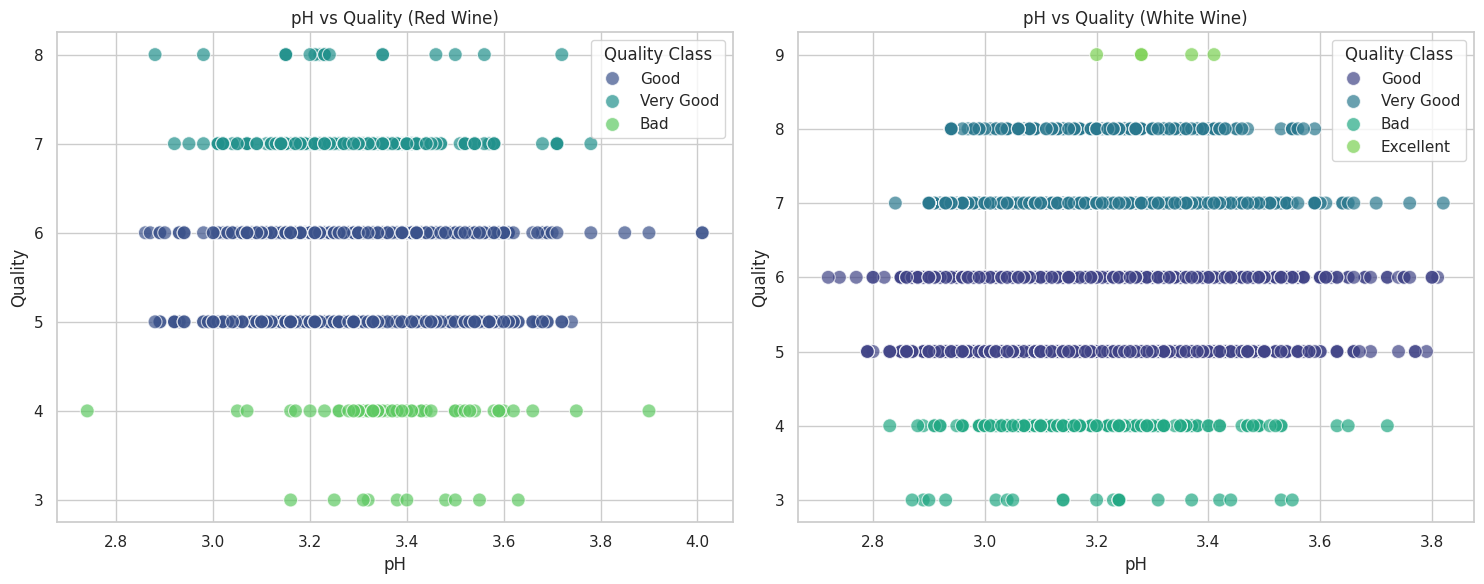

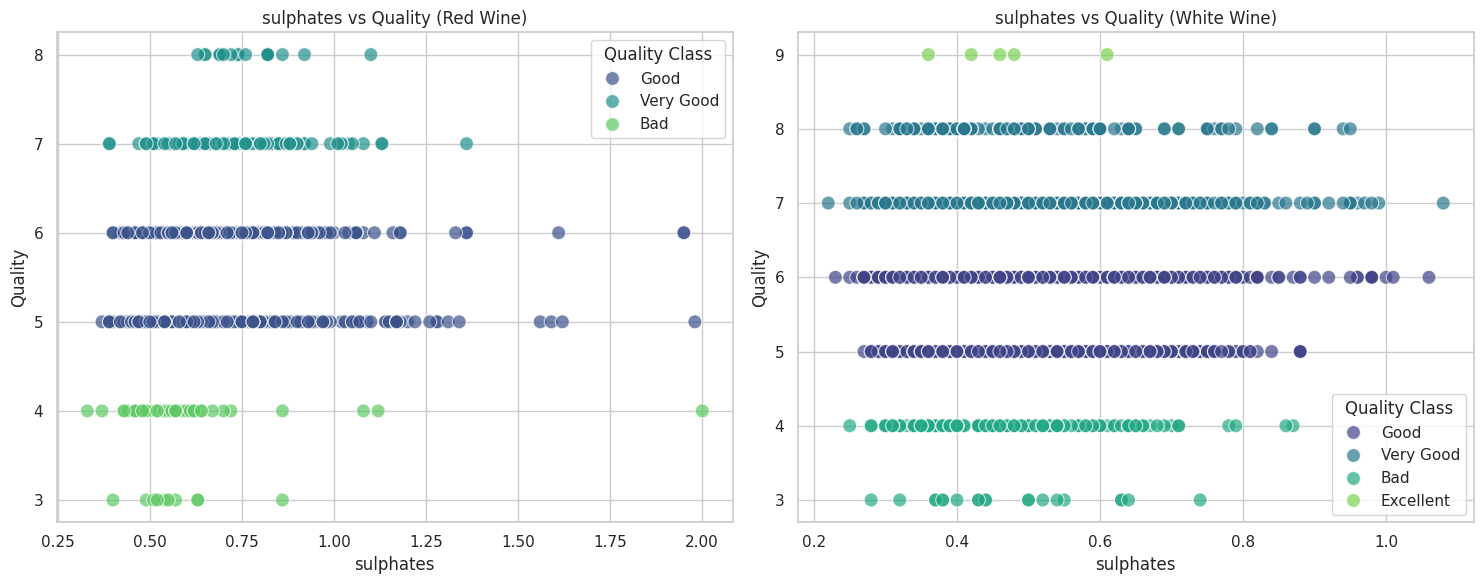

In [12]:
# List of numerical columns excluding 'quality' and 'type'
numerical_cols = df_wine.columns[:-3]

# Set the style for seaborn
sns.set(style='whitegrid')

# Loop through each numerical column
for col in numerical_cols:
    # Define a function to classify the quality
    def classify_quality(quality):
      if quality in [1, 2]:
        return "Very Bad"
      elif quality in [3, 4]:
        return "Bad"
      elif quality in [5, 6]:
        return "Good"
      elif quality in [7, 8]:
        return "Very Good"
      elif quality in [9, 10]:
        return "Excellent"

  # Apply the function to the 'quality' column and create a new 'quality_class' column
    df_wine['quality_class'] = df_wine['quality'].apply(classify_quality)

    # Create a figure with subplots for red and white wine
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Scatter plot for red wine
    sns.scatterplot(
        data=df_wine[df_wine['type'] == 'red'],
        x=col,
        y='quality',
        hue='quality_class',
        palette='viridis',
        s=100,
        alpha=0.7,
        ax=axes[0]
    )
    axes[0].set_title(f'{col} vs Quality (Red Wine)')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Quality')
    axes[0].legend(title='Quality Class')

    # Scatter plot for white wine
    sns.scatterplot(
        data=df_wine[df_wine['type'] == 'white'],
        x=col,
        y='quality',
        hue='quality_class',
        palette='viridis',
        s=100,
        alpha=0.7,
        ax=axes[1]
    )
    axes[1].set_title(f'{col} vs Quality (White Wine)')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Quality')
    axes[1].legend(title='Quality Class')

    # Adjust layout
    plt.tight_layout()
    plt.show()


Are there any corelation between the features?
--

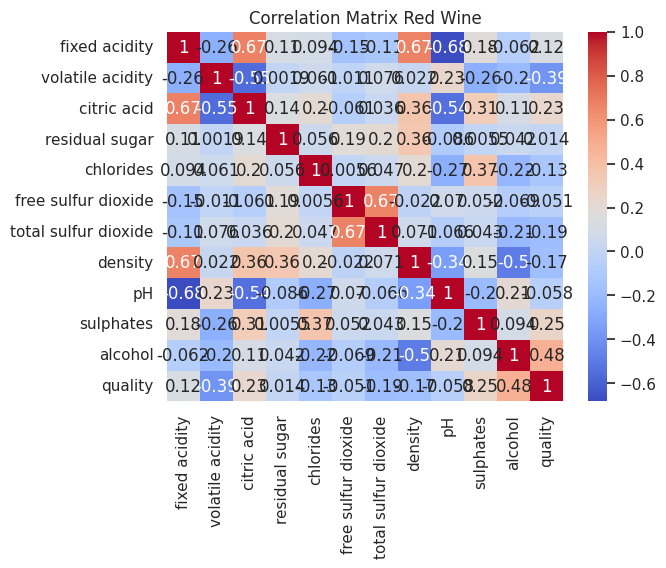

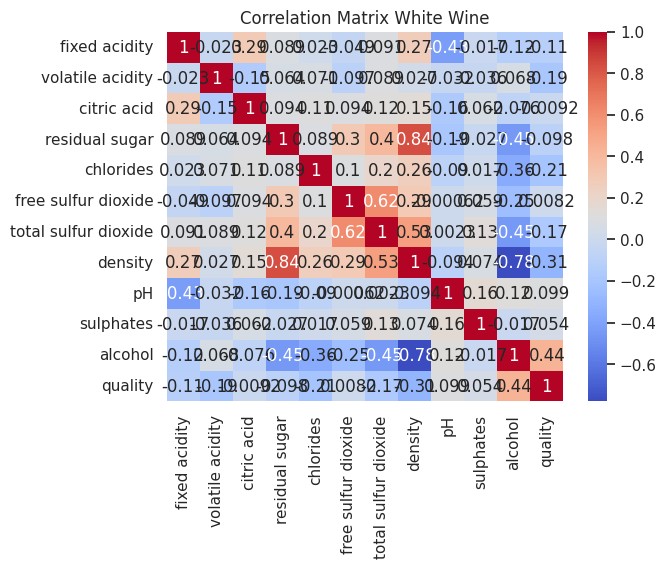

In [13]:
correlation_matrix_red = df_red.corr()
sns.heatmap(correlation_matrix_red, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Red Wine')
plt.show()
correlation_matrix_white = df_white.corr()
sns.heatmap(correlation_matrix_white, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix White Wine')
plt.show()

Red Wine features

Fixed acidity is moderate corelated with Density, PH and Citric Acid.
Free sulfur dioxide is moderate corelated with total sulfur dioxide.

It could be removed density, PH, Citric Acid and Free sulfur dioxide.

White Wine features

Residual sugar is strong corelated with Density.
Alcohol is moderate corelated with Density.

Residual sugar have to be reomved and Alcohol could be reomved.



In [14]:
# List of columns to drop
columns_to_drop = ['density', 'pH', 'citric acid', 'free sulfur dioxide']

# Drop the columns from df_red
df_red = df_red.drop(columns=columns_to_drop)

# Display the first few rows of df_red to confirm the columns have been removed
df_red.head()






,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,34.0,0.56,9.4,5
1,7.8,0.88,2.6,0.098,67.0,0.68,9.8,5
2,7.8,0.76,2.3,0.092,54.0,0.65,9.8,5
3,11.2,0.28,1.9,0.075,60.0,0.58,9.8,6
4,7.4,0.70,1.9,0.076,34.0,0.56,9.4,5


In [15]:
# Removing the specified columns from the df_white DataFrame
columns_to_remove_white = ['residual sugar', 'alcohol']
df_white = df_white.drop(columns=columns_to_remove_white)

# Display the first few rows of the updated DataFrame to confirm the columns were removed
df_white.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.0,0.27,0.36,0.045,45.0,170.0,1.0010,3.00,0.45,6
1,6.3,0.30,0.34,0.049,14.0,132.0,0.9940,3.30,0.49,6
2,8.1,0.28,0.40,0.050,30.0,97.0,0.9951,3.26,0.44,6
3,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,6
4,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,6


The corelation between variables was removed.

Are the majority of the wine quality good?
--

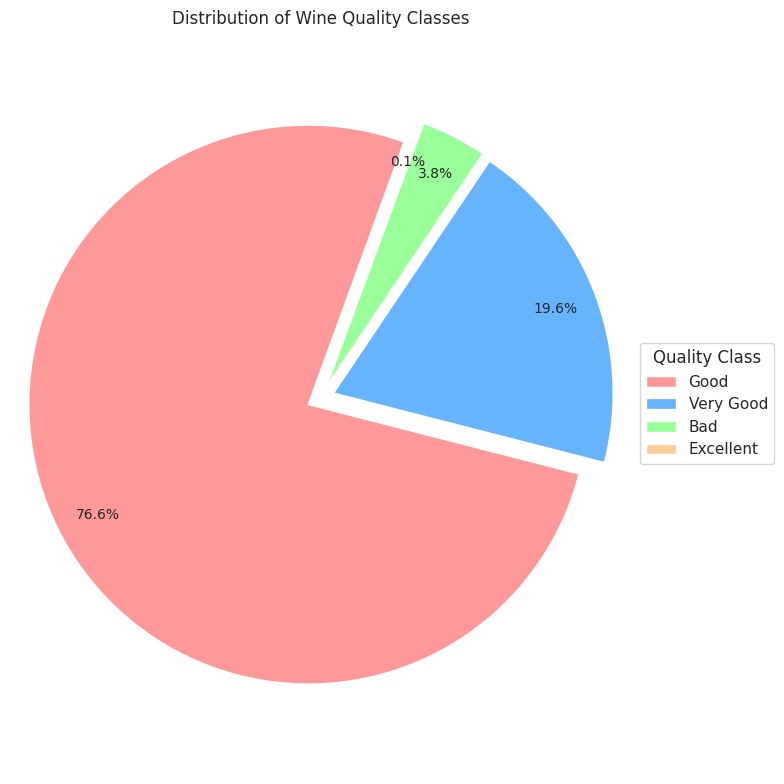

In [16]:
# Define a function to classify the quality
def classify_quality(quality):
    if quality in [1, 2]:
        return "Very Bad"
    elif quality in [3, 4]:
        return "Bad"
    elif quality in [5, 6]:
        return "Good"
    elif quality in [7, 8]:
        return "Very Good"
    elif quality in [9, 10]:
        return "Excellent"

# Apply the function to the 'quality' column and create a new 'quality_class' column
df_wine['quality_class'] = df_wine['quality'].apply(classify_quality)



# Calculate the counts of each quality class
quality_counts = df_wine['quality_class'].value_counts()

# Define colors and explode values to separate slices
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
explode = [0.05] * len(quality_counts)  # Slightly explode each slice

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    quality_counts,
    autopct='%1.1f%%',
    startangle=70,
    colors=colors,
    explode=explode,
    pctdistance=0.85,  # Adjusts distance of percentage labels from center
    labeldistance=1.1  # Adjust distance of labels from the center
)

# Adjust text size for better readability
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(10)

# Add a legend outside the chart to avoid overlap
plt.legend(wedges, quality_counts.index, title="Quality Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Wine Quality Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


Yes, the majority of wine have a good quality.

# Machine Learning Modeling.

Feature Selection
--


Which features are more relevant?

Percentage of variance explained by each component
[0.28489206 0.17082424 0.12892717 0.11244932 0.09420281 0.07765084
 0.06241178 0.04986854 0.01877323]


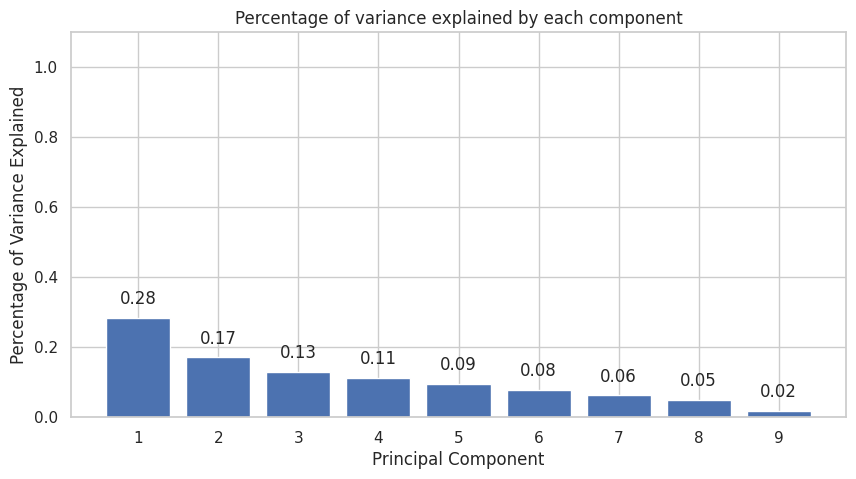

In [33]:
datos = df_red
# Training PCA model with data scaling
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)
# Extract the trained model from the pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Percentage of variance explained by each component
print('Percentage of variance explained by each component')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns; sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1, height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1); ax.set_ylim(0, 1.1)
ax.set_title('Percentage of variance explained by each component')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Percentage of Variance Explained');



Percentage of variance explained by each component
[0.23272517 0.15950166 0.14035633 0.09469953 0.08641003 0.08166032
 0.0654854  0.05936736 0.04021071 0.02667417 0.01290932]


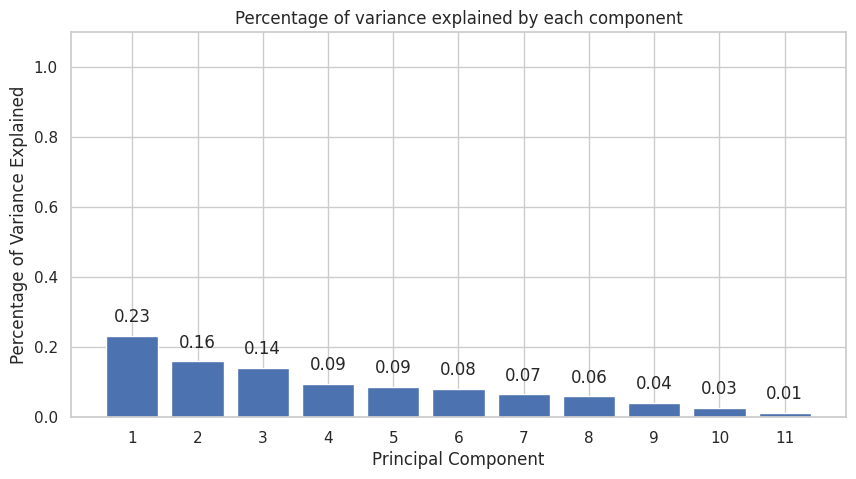

In [34]:
datos = df_white
# Training PCA model with data scaling
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)
# Extract the trained model from the pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Percentage of variance explained by each component
print('Percentage of variance explained by each component')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns; sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1, height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1); ax.set_ylim(0, 1.1)
ax.set_title('Percentage of variance explained by each component')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Percentage of Variance Explained');


It's observed that the first 4 features are the most releant. However, as the set of features is no too large, all the features are kept to performe the ML model.

Label Encoder
--


In [35]:
# Define a function to classify the quality (with labels for LabelEncoder)
def classify_quality(quality):
    if quality in [1, 2]:
        return "Very Bad"
    elif quality in [3, 4]:
        return "Bad"
    elif quality in [5, 6]:
        return "Good"
    elif quality in [7, 8]:
        return "Very Good"
    elif quality in [9, 10]:
        return "Excellent"

# Apply the classify function to both dataframes to create the 'quality_class' column
df_red['quality_class'] = df_red['quality'].apply(classify_quality)
df_white['quality_class'] = df_white['quality'].apply(classify_quality)

# Define and apply LabelEncoder with the specified order
# Custom encoding order
custom_order = ["Very Bad", "Bad", "Good", "Very Good", "Excellent"]

# Label encoding for red wine
label_encoder_red = LabelEncoder()
label_encoder_red.classes_ = np.array(custom_order)  # Convert custom_order to a NumPy array
df_red['quality_class'] = label_encoder_red.transform(df_red['quality_class'])
# Label encoding for white wine
label_encoder_white = LabelEncoder()
label_encoder_white.classes_ = np.array(custom_order)  # Convert custom_order to a NumPy array
df_white['quality_class'] = label_encoder_white.transform(df_white['quality_class'])

# Verify the encoded quality classes
print("Encoded Red wine quality classes:\n", df_red['quality_class'].value_counts())
print("Encoded White wine quality classes:\n", df_white['quality_class'].value_counts())

Encoded Red wine quality classes:
 quality_class
2    1319
3     217
1      63
Name: count, dtype: int64
Encoded White wine quality classes:
 quality_class
2    3655
3    1055
1     183
4       5
Name: count, dtype: int64


Is the target feature balanced?
--





In [36]:
df_red['quality_class'].value_counts() #target

,count
quality_class,
2,1319
3,217
1,63


In [37]:
df_white['quality_class'].value_counts() #target

,count
quality_class,
2,3655
3,1055
1,183
4,5


The target feature is no balanced, so it is necessary to balance it.


In [38]:
# Balancing the target feature 'quality_class'
balanced_df_red = pd.DataFrame()  # DataFrame vacío para los datos balanceados
for quality in df_red['quality_class'].unique():

      subset = df_red[df_red['quality_class'] == quality]
      balanced_subset = resample(subset, replace=True, n_samples=df_red['quality_class'].value_counts().max(), random_state=42)
      balanced_df_red = pd.concat([balanced_df_red, balanced_subset])

balanced_df_red['quality_class'].value_counts() #target


,count
quality_class,
2,1319
3,1319
1,1319


In [39]:
# Balancing the target feature 'quality_class'
balanced_df_white = pd.DataFrame()
for quality in df_white['quality_class'].unique():
      subset = df_white[df_white['quality_class'] == quality]
      balanced_subset = resample(subset, replace=True, n_samples=df_white['quality_class'].value_counts().max(), random_state=42)
      balanced_df_white = pd.concat([balanced_df_white, balanced_subset])

balanced_df_white['quality_class'].value_counts() #target

,count
quality_class,
2,3655
3,3655
1,3655
4,3655


Model Selection
---

It is situable using a regression model?
To answer that, a OLS model is performed:




In [40]:
# Replace spaces with underscores in all column names
df_red.columns = [col.replace(" ", "_") for col in df_red.columns]
df_white.columns = [col.replace(" ", "_") for col in df_white.columns]

# Define the formula for the regression model
model_formula1 = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + total_sulfur_dioxide + sulphates + alcohol'
# Fit the OLS regression model
lm1 = sm.ols(formula=model_formula1, data=df_red).fit()

# Print the summary of the regression model
print("**Red Wine Results**")
print(lm1.summary())

# Define the formula for the regression model
model_formula2 = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates'
# Fit the OLS regression model
lm2 = sm.ols(formula=model_formula2, data=df_white).fit()

# Print the summary of the regression model
print("**White Wine Results**")
print(lm2.summary())

**Red Wine Results**
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     124.6
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          4.19e-146
Time:                        14:32:38   Log-Likelihood:                -1577.2
No. Observations:                1599   AIC:                             3170.
Df Residuals:                    1591   BIC:                             3213.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept  

The OLS models for red and white wines offer insights into predictors of quality, though with varying success:

Red Wine Model:

R² = 0.354: This indicates moderate explanatory power.
Key Predictors: Significant predictors include volatile_acidity, chlorides, sulphates, and alcohol. Higher volatile_acidity and chlorides decrease quality, while sulphates and alcohol increase it.
Residuals: Show slight deviation from normality, with mild multicollinearity.

White Wine Model:

R² = 0.163: Indicates low explanatory power, suggesting other factors influence quality.
Key Predictors: Significant predictors include volatile_acidity, chlorides, density, free_sulfur_dioxide, and sulphates. volatile_acidity, chlorides, and density are negatively associated, while sulphates and free_sulfur_dioxide have positive effects.
Residuals: Deviate from normality with high multicollinearity, which may distort estimates.

Conclusion: The red wine model shows moderate predictive capability, while the white wine model is weaker. Addressing multicollinearity, exploring non-linear models, and adding more predictors could enhance both models.

To handling multicollinearity and exploring complex non-linear relationships, a Random forest will be performed.

Random Forest would be a suitable machine learning model to predict wine quality based on physicochemical features:

1. **Nature of Random Forest**
   - **Random Forest** is an ensemble learning method, meaning it combines multiple decision trees to make a prediction. It constructs each tree using random subsets of the data and features, and then it averages the predictions of these trees to produce a final result.
   - This ensemble approach reduces the **risk of overfitting** (a common issue in single decision trees) and leads to **more stable and generalizable predictions**.
2. **Handling Non-linearity and Complex Relationships**
   - Wine quality prediction may involve **non-linear relationships** among features like acidity, sugar levels, pH, etc. Unlike linear models, which assume a linear relationship between inputs and outputs, Random Forest can capture complex, non-linear relationships.
   - The **decision-tree structure** within Random Forest allows it to effectively partition the feature space based on these relationships, improving its capacity to model intricate patterns in the data.

3. **Feature Importance for Interpretability**
   - Random Forest can compute **feature importance** scores, ranking the physicochemical attributes (e.g., fixed acidity, citric acid) in terms of their contribution to wine quality. This makes the model **interpretable** for business stakeholders who want insights into what attributes affect quality the most.
   - Knowing the importance of each feature can be beneficial if you later want to optimize wine quality by adjusting the most influential variables.

4. **Handling Imbalanced Data**
   - In cases where certain quality categories (e.g., ‘Excellent’) are less frequent, Random Forest can handle **imbalanced classes** relatively well. The ensemble of trees averages the influence of these less common categories across trees, reducing the chance that they are entirely neglected.
   - You can also adjust **class weights** within the Random Forest to place more emphasis on underrepresented classes, improving performance on imbalanced datasets.

5. **Resistant to Noise**
   - Random Forest is robust to noise, meaning it can tolerate some **irrelevant or noisy features** without severely affecting performance. This is advantageous if your physicochemical measurements contain any inaccuracies.

6. **Prediction and Classification Capabilities**
   - Whether you are predicting specific quality scores (a **regression problem**) or predicting discrete quality classes (e.g., **classification problem**), Random Forest can handle both types. If you’re classifying wine into categories (like "Excellent," "Very Good"), it is possible to configure the Random Forest as a classifier or predict a quality score by using regression.

Possible Drawbacks
   - **Computationally Intensive**: Random Forests can require more computational resources, especially with large datasets or many trees.
   - **Interpretability**: Although Random Forest can provide feature importance, the combined decisions of many trees make it less interpretable than simpler models.

Summary
   - Random Forest would likely be a strong, reliable model to predict wine quality based on physicochemical properties, offering a good balance between accuracy and interpretability.
   - However, it could be interisting to experiment with other models (like Gradient Boosting) as well to see if they perform better, especially if the dataset is very large or has many complex interactions.

# Random Forest Classification

Model Fitting
--

Defining the dependent (target) and the independents features.

In [41]:
X_red = balanced_df_red.drop(['quality','quality_class'], axis=1)
y_red = balanced_df_red['quality_class']

X_white = balanced_df_white.drop(['quality','quality_class'], axis=1)
y_white = balanced_df_white['quality_class']

In [42]:
X_white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates'],
      dtype='object')

Dividing the data set between train and test data.

In [43]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
x_train_white, x_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

Fitting the model

In [44]:
model_red = RandomForestClassifier(random_state=42)
model_red.fit(X_train_red, y_train_red)
model_white = RandomForestClassifier(random_state=42)
model_white.fit(x_train_white, y_train_white)


RandomForestClassifier(random_state=42)

Model Evaluation
--

It is used Accuracy score to test the model. Accuracy scores measure how well a machine learning model correctly predicts or classifies data points relative to the total number of cases. Specifically, in classification tasks, accuracy is calculated as the proportion of correct predictions to the total predictions made. For example, an accuracy score of 97.7% means the model correctly classified 97.7% of the wine quality ratings in the test dataset. High accuracy suggests the model is effective for this task, though it doesn't account for class imbalances or potential overfitting.

In [45]:
y_pred_red = model_red.predict(X_test_red)
accuracy_red = accuracy_score(y_test_red, y_pred_red)
accuracy_red


0.9785353535353535

In [46]:

y_pred_white = model_white.predict(x_test_white)
accuracy_white = accuracy_score(y_test_white, y_pred_white)
accuracy_white

0.9770861833105335

Bottom Line
--

Using a Random Forest Classifier to predict wine quality based on physicochemical properties proved highly effective. With accuracy scores of approximately 97.9% for red wine and 97.7% for white wine, the model demonstrated excellent classification performance. This high accuracy indicates that the Random Forest algorithm is well-suited for capturing the underlying relationships between the chemical composition of wines and their quality ratings. The model’s success suggests that it can reliably assist in quality prediction, offering potential practical applications in wine production and quality control. Future work could explore further fine-tuning and alternative models to maximize performance and interpretability.



# Ramdon Forest Regression

Model Fitting and Evaluation
--

In [47]:
# Separate features and target variable
X_red = balanced_df_red.drop(['quality','quality_class'], axis=1)  # Physicochemical features
y_red = balanced_df_red["quality"]  # Quality score

X_white = balanced_df_white.drop(['quality','quality_class'], axis=1)  # Physicochemical features
y_white = balanced_df_white["quality"]  # Quality score

# Split the data into training and test sets (80% train, 20% test)
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
x_train_white, x_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor_red = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_red.fit(X_train_red, y_train_red)

rf_regressor_white = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_white.fit(x_train_white, y_train_white)

# Make predictions on the test set
y_pred_red = rf_regressor_red.predict(X_test_red)
y_pred_white = rf_regressor_white.predict(x_test_white)

# Evaluate the model
mae_red = mean_absolute_error(y_test_red, y_pred_red)
r2_red = r2_score(y_test_red, y_pred_red)

mea_white = mean_absolute_error(y_test_white, y_pred_white)
r2_white = r2_score(y_test_white, y_pred_white)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE) Red Wine: {mae_red:.2f}")
print(f"R² Score Red Wine: {r2_red:.2f}")
print(f"Mean Absolute Error (MAE) White Wine: {mea_white:.2f}")
print(f"R² Score White Wine: {r2_white:.2f}")

Mean Absolute Error (MAE) Red Wine: 0.11
R² Score Red Wine: 0.96
Mean Absolute Error (MAE) White Wine: 0.09
R² Score White Wine: 0.99


Bottom Line
--

The Random Forest model demonstrates excellent predictive accuracy for both red and white wine quality. With an R² score of 0.96 and an MAE of 0.11 for red wine, and an R² score of 0.99 with an MAE of 0.08 for white wine, the model effectively captures the underlying patterns and minimizes prediction errors in both datasets. These results indicate that the model is highly reliable and suitable for production deployment across both red and white wine quality predictions.

# Final Conclusions
Two tools to predict wine quality were developed, offering wine producers the potential to streamline quality control processes with more efficiency and accuracy. Producers could adopt either model, depending on the accuracy each demonstrates during real-world application. A recommended approach is to initially validate these tools by using them alongside traditional quality testing methods. This validation phase will allow producers to assess real-world accuracy and ensure confidence in the model's predictions. Over time, the traditional method could either be phased out or used complementarily as a secondary measure.

The implications of these predictive tools extend beyond the wine industry. By identifying key physicochemical predictors of quality, similar methodologies can be adapted for use in other agro-industrial sectors such as oilseeds (soybean, canola, palm oil), olive oil, and other varieties of wines and spirits. These industries share common challenges in quality assurance where physicochemical properties strongly influence product value.

By leveraging data-driven insights, these models have the potential to enhance quality prediction processes across various sectors, fostering improved resource allocation, faster decision-making, and ultimately, more consistent product standards.